In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/temu-dataset-us-online-mareket-place/temu_product_sales_dataset.csv


In [2]:
temu = pd.read_csv("/kaggle/input/temu-dataset-us-online-mareket-place/temu_product_sales_dataset.csv")
temu.head()

,leve_1_category_id,leve_1_category_name,leve_2_category_id,leve_2_category_name,title,goods_id,sales_info,category_id,visible,sales_volume,price_str,price,goods_score,comments_num_raw,comment_num
0,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,1pc 30 LED Bubble Ball Lights Solar String Lig...,6017592186061056,"5,560 sold",891,True,5560.0,655,6.55,4.7,(200),200.0
1,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,50 LED Solar Sakura Lights Outdoor Waterproof ...,6017592186060804,"3,569 sold",891,True,3569.0,589,5.89,4.7,(200),200.0
2,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,10m 20m 30m Solar Copper Wire String Light Hol...,6017592186060676,"2,364 sold",891,True,2364.0,489,4.89,4.7,(200),200.0
3,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"LED String Lights, Battery Operated Copper Wir...",601099511741738,538 sold,891,True,538.0,159,1.59,5.0,(1),1.0
4,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"1pc 39ft 100LED Solar String Lights, Waterproo...",601099511988179,474 sold,891,True,474.0,839,8.39,4.7,(200),200.0


In [3]:
temu.shape

(95189, 15)

In [4]:
temu.columns

Index(['leve_1_category_id', 'leve_1_category_name', 'leve_2_category_id',
       'leve_2_category_name', 'title', 'goods_id', 'sales_info',
       'category_id', 'visible', 'sales_volume', 'price_str', 'price',
       'goods_score', 'comments_num_raw', 'comment_num'],
      dtype='object')

In [5]:
temu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95189 entries, 0 to 95188
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   leve_1_category_id    95189 non-null  int64  
 1   leve_1_category_name  95189 non-null  object 
 2   leve_2_category_id    95189 non-null  int64  
 3   leve_2_category_name  95189 non-null  object 
 4   title                 95189 non-null  object 
 5   goods_id              95189 non-null  int64  
 6   sales_info            93480 non-null  object 
 7   category_id           95189 non-null  int64  
 8   visible               95189 non-null  bool   
 9   sales_volume          93480 non-null  float64
 10  price_str             95189 non-null  int64  
 11  price                 95189 non-null  float64
 12  goods_score           81070 non-null  float64
 13  comments_num_raw      81070 non-null  object 
 14  comment_num           81070 non-null  float64
dtypes: bool(1), float64

In [6]:
temu.rename(columns={"leve_1_category_id":"Level1_Category_ID","leve_1_category_name":"Level1_Category_Name",
                    "leve_2_category_id":"Level2_Category_ID",
                    "leve_2_category_name":"Level2_Category_Name",
                    "title":"Description",
                    "goods_score":"Ratings",
                    "comment_num":"Number_of_Comments",
                    "price":"Price",
                    "sales_volume":"Sales_Volume"},inplace=True)

In [7]:
temu.drop(columns=["sales_info","category_id","price_str","goods_id","visible","comments_num_raw"],
         inplace=True)
temu.head()

,Level1_Category_ID,Level1_Category_Name,Level2_Category_ID,Level2_Category_Name,Description,Sales_Volume,Price,Ratings,Number_of_Comments
0,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,1pc 30 LED Bubble Ball Lights Solar String Lig...,5560.0,6.55,4.7,200.0
1,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,50 LED Solar Sakura Lights Outdoor Waterproof ...,3569.0,5.89,4.7,200.0
2,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,10m 20m 30m Solar Copper Wire String Light Hol...,2364.0,4.89,4.7,200.0
3,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"LED String Lights, Battery Operated Copper Wir...",538.0,1.59,5.0,1.0
4,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"1pc 39ft 100LED Solar String Lights, Waterproo...",474.0,8.39,4.7,200.0


In [8]:
temu.info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of        Level1_Category_ID  Level1_Category_Name  Level2_Category_ID  \
0                     885  Patio, Lawn & Garden                 888   
1                     885  Patio, Lawn & Garden                 888   
2                     885  Patio, Lawn & Garden                 888   
3                     885  Patio, Lawn & Garden                 888   
4                     885  Patio, Lawn & Garden                 888   
...                   ...                   ...                 ...   
95184                 731       Bags & Luggages                1139   
95185                 731       Bags & Luggages                1139   
95186                 731       Bags & Luggages                1139   
95187                 731       Bags & Luggages                1139   
95188                 731       Bags & Luggages                1139   

                     Level2_Category_Name  \
0      Outdoor Supplies & Patio Furniture   
1      Outdoor Supplies &

## EDA of numerical data

<function matplotlib.pyplot.show(close=None, block=None)>

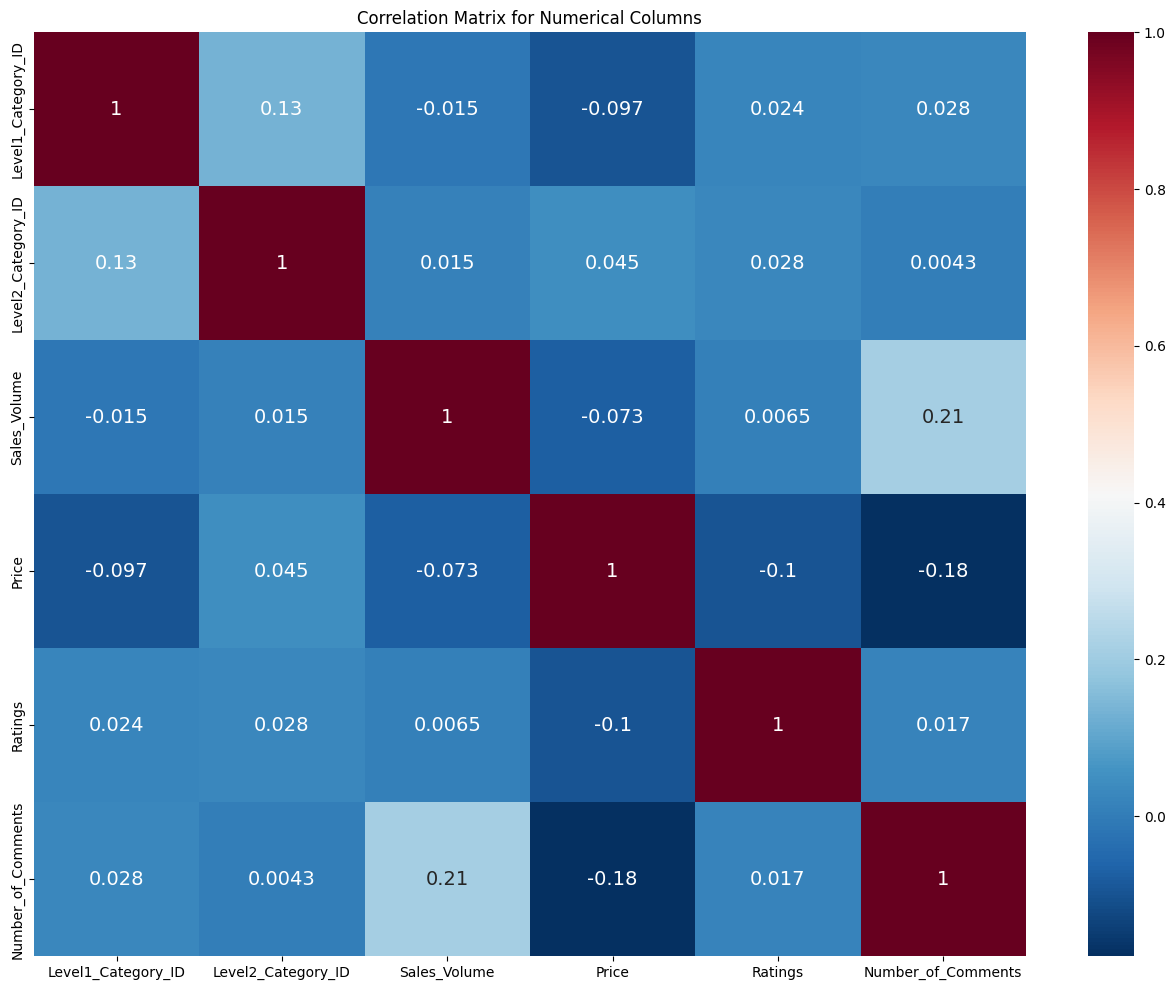

In [9]:
# Plot the correlation matrix for numerical columns in the dataframe

numerical_columns = temu.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(16,12))
sns.heatmap(numerical_columns.corr(),annot=True,annot_kws={"fontsize":14},
           cmap="RdBu_r")
plt.title("Correlation Matrix for Numerical Columns")
plt.show

| Correlation Coefficient | Feature 1 | Feature 2 |
|----------|----------|----------|
| 0.21   | Number_of_Comments   | Sales_Volume   |
| 0.13   | Level1_Category_ID   | Level2_Category_ID   |
| -0.1   | Ratings   | Price  |
| -0.18   | Number_of_Comments   | Price  |

### Exploring ratings

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


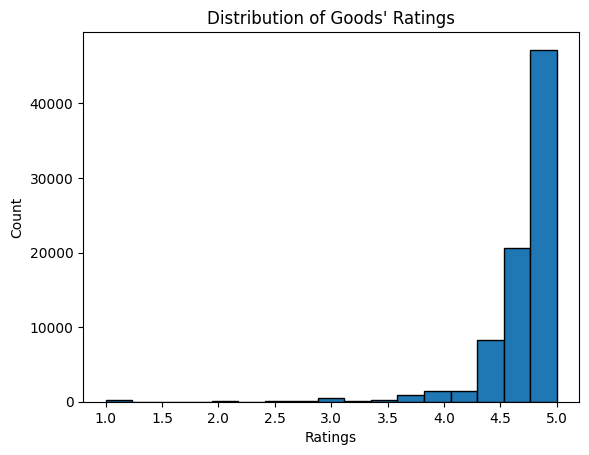

In [10]:
fig, ax = plt.subplots()

bins = int(1+np.log2(len(temu))) # Using Sturge's Formula to calculate bins

ax.hist(temu["Ratings"],bins=bins,edgecolor="black")

ax.set_title("Distribution of Goods' Ratings")
ax.set_ylabel("Count")
ax.set_xlabel("Ratings")
plt.show()

In [11]:
temu["Ratings"]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        4.7
1        4.7
2        4.7
3        5.0
4        4.7
        ... 
95184    1.0
95185    NaN
95186    NaN
95187    1.0
95188    NaN
Name: Ratings, Length: 95189, dtype: float64

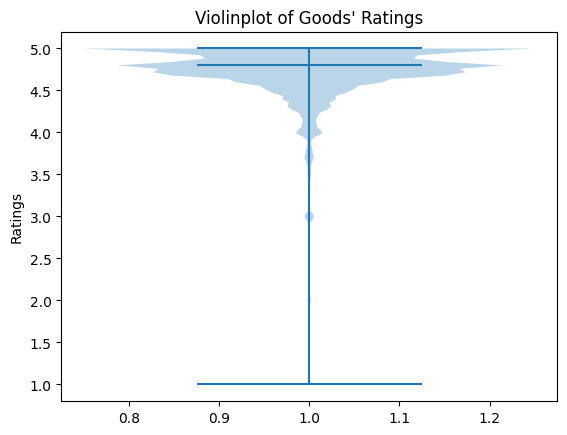

In [12]:
fig, ax = plt.subplots()
ax.violinplot(temu["Ratings"].dropna().values,showmedians=True)
ax.set_title("Violinplot of Goods' Ratings")
ax.set_ylabel("Ratings")
plt.show()

#### IQR and Equal-width Binning

Firstly,we calculate the IQR of goods' ratings.

In [13]:
twenty_fifth_rating = temu['Ratings'].quantile(0.25)
seventy_fifth_rating = temu['Ratings'].quantile(0.75)
iqr = round(seventy_fifth_rating-twenty_fifth_rating,2)
print(f'The 25th percentile of ratings is {twenty_fifth_rating} while the 75th percentile is {seventy_fifth_rating} with an IQR of ratings at {iqr}')

The 25th percentile of ratings is 4.7 while the 75th percentile is 5.0 with an IQR of ratings at 0.3


Secondly, we discretize data into bins and calculate the frequency of each bin.

In [14]:
binned_ratings = pd.cut(temu['Ratings'],bins) # By using bins we calculated via Sturge's Formula before
count_ratings = binned_ratings.dropna().value_counts()
print(count_ratings)
normalized_ratings = binned_ratings.dropna().value_counts(normalize=True)
normalized_ratings.map(lambda x: f"{x*100:.2f}%")

Ratings
(4.765, 5.0]      47185
(4.529, 4.765]    20653
(4.294, 4.529]     8228
(3.824, 4.059]     1418
(4.059, 4.294]     1406
(3.588, 3.824]      899
(2.882, 3.118]      498
(3.353, 3.588]      232
(0.996, 1.235]      164
(1.941, 2.176]      158
(3.118, 3.353]      130
(2.647, 2.882]       43
(2.412, 2.647]       31
(2.176, 2.412]       25
(1.235, 1.471]        0
(1.706, 1.941]        0
(1.471, 1.706]        0
Name: count, dtype: int64


Ratings
(4.765, 5.0]      58.20%
(4.529, 4.765]    25.48%
(4.294, 4.529]    10.15%
(3.824, 4.059]     1.75%
(4.059, 4.294]     1.73%
(3.588, 3.824]     1.11%
(2.882, 3.118]     0.61%
(3.353, 3.588]     0.29%
(0.996, 1.235]     0.20%
(1.941, 2.176]     0.19%
(3.118, 3.353]     0.16%
(2.647, 2.882]     0.05%
(2.412, 2.647]     0.04%
(2.176, 2.412]     0.03%
(1.235, 1.471]     0.00%
(1.706, 1.941]     0.00%
(1.471, 1.706]     0.00%
Name: proportion, dtype: object

After normalizing the ratings data, we observe that 58.20% of the products, totaling 47,185 rows, fall within the highest rating range of 4.765 to 5.0.

### Exploring Number of Comments

In [15]:
temu.columns

Index(['Level1_Category_ID', 'Level1_Category_Name', 'Level2_Category_ID',
       'Level2_Category_Name', 'Description', 'Sales_Volume', 'Price',
       'Ratings', 'Number_of_Comments'],
      dtype='object')

Firstly, we calculate the descriptive statistics and Distribution.

In [16]:
print(f"Total Number of Comments: {temu['Number_of_Comments'].sum()}")
print(f"Average Number of Comments: {temu['Number_of_Comments'].mean()}")
print(f"Median Number of Comments: {temu['Number_of_Comments'].median()}")
print(f"Maximum Number of Comments: {temu['Number_of_Comments'].max()}")
print(f"Minimum Number of Comments: {temu['Number_of_Comments'].min()}")

Total Number of Comments: 11672097.0
Average Number of Comments: 143.97553965708647
Median Number of Comments: 30.0
Maximum Number of Comments: 3340.0
Minimum Number of Comments: 1.0


Before we analyze the distribution of number of comments, we should first find and replace the non-finite values.

In [17]:
non_finite_values = temu[temu['Number_of_Comments'].isna() | 
np.isinf(temu['Number_of_Comments'])]

print("Non-finite values in the 'Number_of_Comments':")
non_finite_values['Number_of_Comments']

Non-finite values in the 'Number_of_Comments':


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


12      NaN
26      NaN
36      NaN
41      NaN
42      NaN
         ..
95177   NaN
95178   NaN
95185   NaN
95186   NaN
95188   NaN
Name: Number_of_Comments, Length: 14119, dtype: float64

In [18]:
# Note that our bins was already calculated before
bins

17

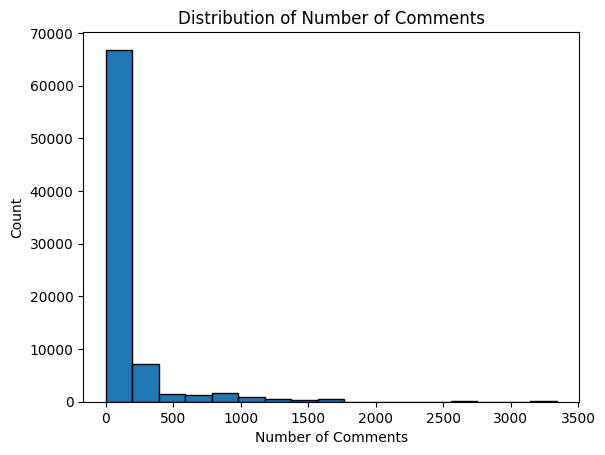

In [19]:
fig, ax = plt.subplots()

bins = int(1+np.log2(len(temu))) # Using Sturge's Formula to calculate bins

ax.hist(temu[~(temu['Number_of_Comments'].isna() |  
np.isinf(temu['Number_of_Comments']))]['Number_of_Comments'],bins=bins,edgecolor="black")


ax.set_title("Distribution of Number of Comments")
ax.set_ylabel("Count")
ax.set_xlabel("Number of Comments")
plt.show()

When dealing with a numerical data variable that has a right-skewed distribution, it would be preferable to utilize the median to fill in the missing data. because a sizable portion of the data points in this feature are missing, and there is no metadata to indicate why. To prevent bias, maintain the data's overall distribution, and prevent the introduction of false patterns, it could be wiser to substitute the median for them.

#### Standardizing data

In [20]:
temu["Number_of_Comments"] = temu['Number_of_Comments'].fillna(temu['Number_of_Comments'].median()).astype(int)
print(temu["Number_of_Comments"].isna().sum()) #### Making sure there are zero (0) non-finite values after imputation

0


Now we will analyze the number of comments by looking at extreme counts of comments. We will find out the highest and lowest counts of comments and how much they account for the total number of comments.

> Highest count

In [21]:
value_counts = temu["Number_of_Comments"].value_counts()
highest_count_value = value_counts.idxmax()
highest_count = value_counts.max()
highest_count_percentage = np.floor(highest_count/len(temu)*100*100)/100
highest_count_percentage
print(f"The number of comments with the highest count is {highest_count_value} with {highest_count} ocurrences, which is {highest_count_percentage} % of the data")

The number of comments with the highest count is 30 with 14651 ocurrences, which is 15.39 % of the data


 > Lowest count

In [22]:
value_counts = temu["Number_of_Comments"].value_counts()
lowest_count_value = value_counts.idxmin()
lowest_count = value_counts.min()
lowest_count_percentage = (lowest_count/len(temu))*100
lowest_count_percentage
print(f"The number of comments with the highest count is {lowest_count_value} with {lowest_count} ocurrence, which is {lowest_count_percentage} % of the data")

The number of comments with the highest count is 287 with 1 ocurrence, which is 0.0010505415541711754 % of the data


Now we can visualize the standardized data to check the difference

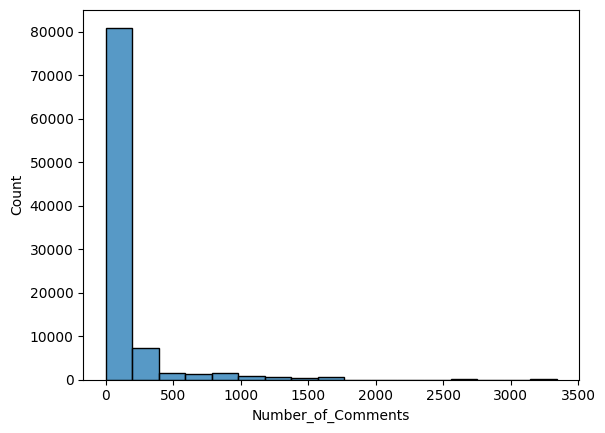

In [23]:
bins = 17
sns.histplot(data = temu, x="Number_of_Comments",bins=bins)
plt.show()

### Exploring price

Descriptive statistics and Distribution

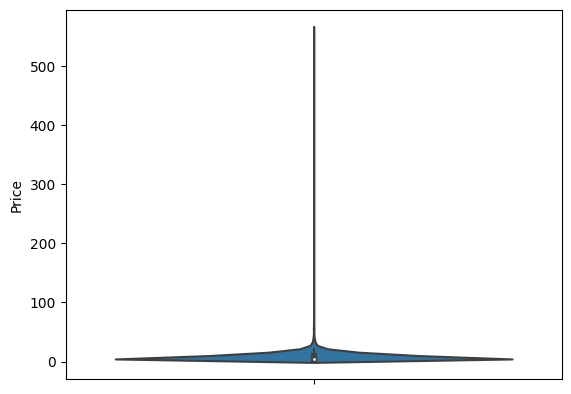

In [24]:
# Visualizing to quickly get a good clue on the density of the data
sns.violinplot(data=temu, y="Price", inner="box")
plt.show()

Based on the skewed distribution of data, what we can see is that most of the items are priced very cheap.
Next, we will find out the maximum price, minimum price, and statistics related to the IQR of the price.

> Maximum price and minimum price with format

In [25]:
def formatted_price(x):
    """ 
    format price into currency(USD)
    """
    return "${:,.2f}".format(x)

In [26]:
max_price = temu["Price"].max(); formatted_max_price = formatted_price(max_price)
min_price = temu["Price"].min(); formatted_min_price = formatted_price(min_price)
max_count_price = temu["Price"].value_counts()[max_price]
min_count_price = temu["Price"].value_counts()[min_price]
print(f"The minimum price point is {formatted_min_price} with the count of {min_count_price} while the maximum price point is {formatted_max_price} with the count of {max_count_price}")

The minimum price point is $0.13 with the count of 1 while the maximum price point is $565.98 with the count of 1


> Statistics related to IQR

In [27]:
twenty_fifth_price = temu["Price"].quantile(.25); formatted_twenty_fifth_price = formatted_price(twenty_fifth_price)
seventy_fifth_price = temu["Price"].quantile(.75); formatted_seventy_fifth_price = formatted_price(seventy_fifth_price)
iqr = formatted_price(seventy_fifth_price-twenty_fifth_price)
print(f"The 25th percentile of prices is {formatted_twenty_fifth_price} while the 75th percentile is {formatted_seventy_fifth_price} wiht an IQR of price at {iqr}")

The 25th percentile of prices is $1.99 while the 75th percentile is $9.39 wiht an IQR of price at $7.40


#### Visualizing price by parent category

We will create a horizontal bar plot to visualize the average of the price points per level 1 category.

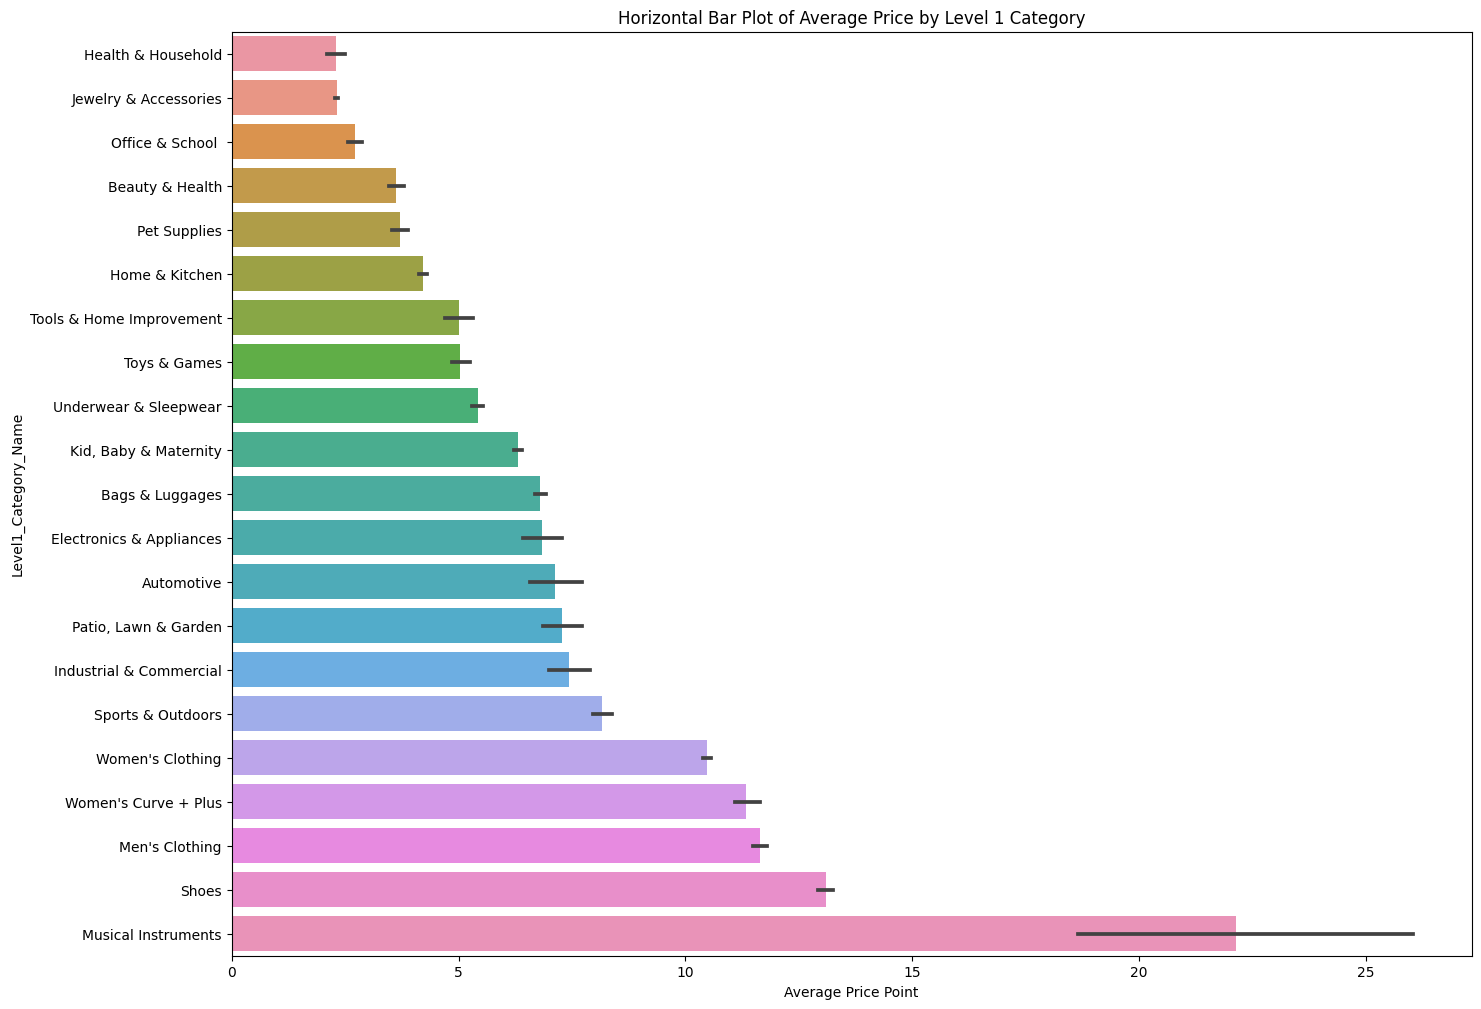

In [28]:
plt.figure(figsize = (16,12))
order_2 = temu.groupby('Level1_Category_Name')['Price'].mean().sort_values().index
sns.barplot(data = temu,x = 'Price',y = 'Level1_Category_Name',orient = 'h',estimator='mean',order = order_2)
plt.xlabel("Average Price Point")
plt.ylabel('Level1_Category_Name')
plt.title("Horizontal Bar Plot of Average Price by Level 1 Category")
plt.show()

Based on the graph, the top5 Level 1 Category with the highest average price points are: "Musical instruments", "Shoes", "Men's Clothing", "Women's Curve + Plus", "Women's Clothing'.

### Exploring sales volume

Descriptive Statistics and Distribution

In [29]:
def format_sales_volume(x):
    return "{:,}".format(int(x))

In [30]:
# total_sales_volume
total_sales_volume = format_sales_volume(temu['Sales_Volume'].sum())
max_sales_volume = format_sales_volume(temu['Sales_Volume'].max())
min_sales_volume = format_sales_volume(temu['Sales_Volume'].min())
twenty_fifth_volume = format_sales_volume(temu['Sales_Volume'].quantile(.25))
seventy_fifth_volume = format_sales_volume(temu['Sales_Volume'].quantile(.75))
iqr_volume = format_sales_volume(temu['Sales_Volume'].quantile(.75)-temu['Sales_Volume'].quantile(.25))
print(f"Total volume of products sold is {total_sales_volume}. \nThe lowest selling item gathered {min_sales_volume} of items sold, while the highest selling item gathered {max_sales_volume} of items sold.\nThe 25th percentile of sales volume is {twenty_fifth_volume} while the 75th percentile is {seventy_fifth_volume} with an IQR of sales volume at {iqr_volume}.")

Total volume of products sold is 5,976,369. 
The lowest selling item gathered 1 of items sold, while the highest selling item gathered 39,011 of items sold.
The 25th percentile of sales volume is 3 while the 75th percentile is 33 with an IQR of sales volume at 30.


Now we want to visualize the sales volume.

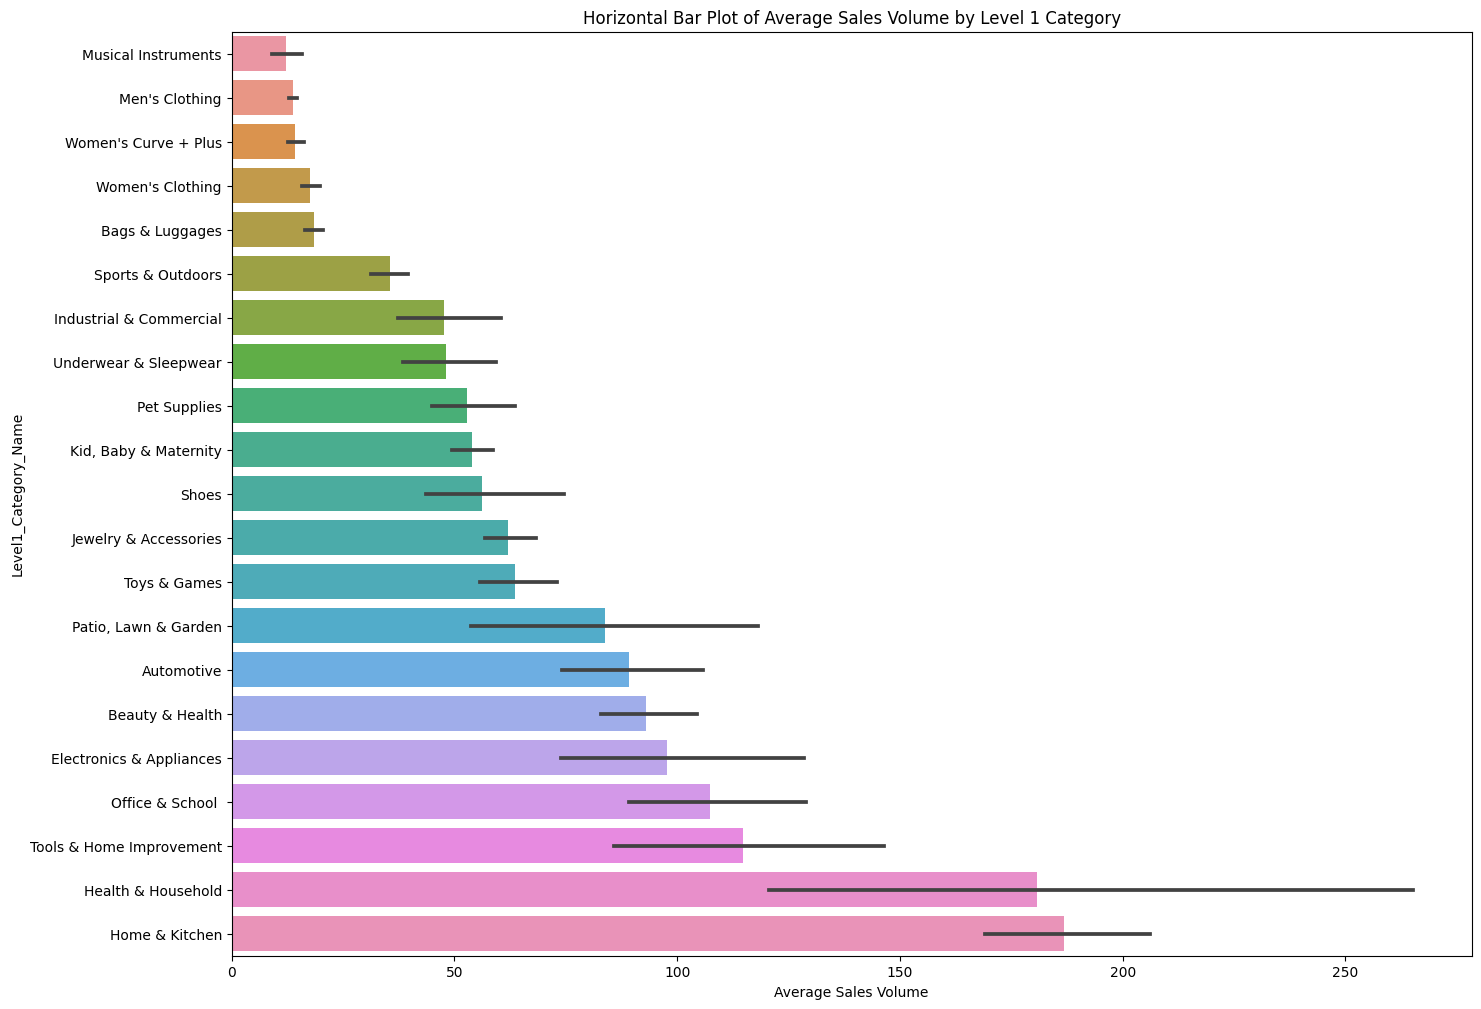

In [31]:
plt.figure(figsize = (16,12))
order = temu.groupby('Level1_Category_Name')['Sales_Volume'].mean().sort_values().index
sns.barplot(data = temu,x = 'Sales_Volume',y = 'Level1_Category_Name',orient = 'h',estimator='mean', order = order)
plt.xlabel('Average Sales Volume')
plt.ylabel('Level1_Category_Name')
plt.title("Horizontal Bar Plot of Average Sales Volume by Level 1 Category")
plt.show()

Based on the graph, the top 5 Level 1 Category with the highest average sales volume are: "Home & Kitchen", "Health & Household", "Tools & Home Improvement", "Office & School", and "Electronics & Appliances."

## EDA of categorical data

Using the same data taken from the Temu e-commerce website, we'll also summarize and validate categorical data, establish patterns or relationships among data, and clean values as necessary. Creating visualizations also helps us further appreciate and understand variables and their relationships.

> Firstly, we want to figure out how many unique parent categories there are in the dataset.

In [32]:
count_unique_parents = temu['Level1_Category_Name'].nunique()
count_unique_parents

21

> Next, we want to visualize the distribution of parent categories

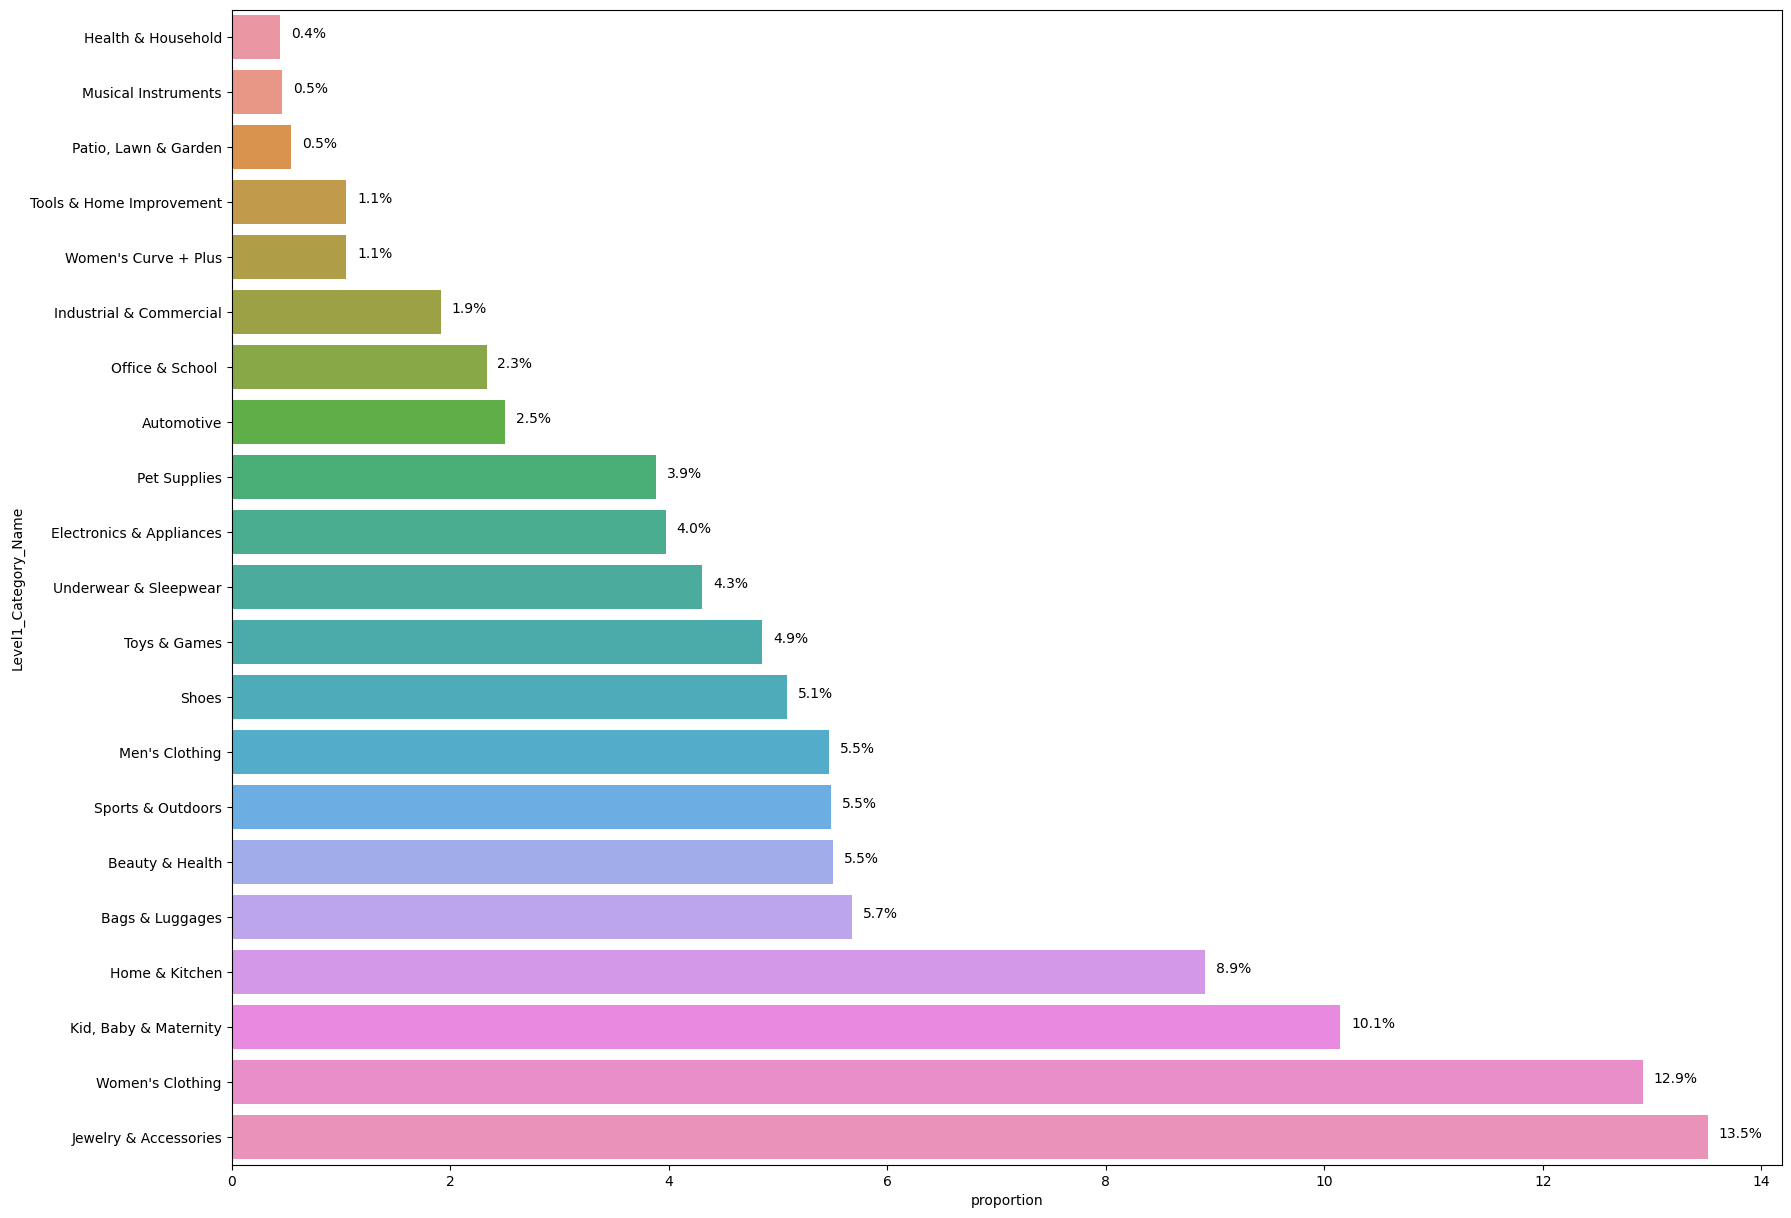

In [33]:
percentage_of_categories = (temu['Level1_Category_Name'].value_counts(normalize = True)*100).sort_values(ascending=True)

# Creating horizontal bar plot
plt.figure(figsize = (20,15))
barplot = sns.barplot(x=percentage_of_categories,y=percentage_of_categories.index)
# Adding percentage labels to each bar
for p in barplot.patches:
    percentage = "{:.1f}%".format(p.get_width())
    # Adjust each bar label's position
    x = p.get_width()+0.1
    y = p.get_y()+p.get_height()/2
    barplot.annotate(percentage,(x,y))

The top 5 parent product categories where a majority of the data points belong are: "Jewelry & Accesories", "Women's Clothing", "Kid, Baby & Maternity", "Home & Kitchen", and "Bags & Luggages".

Child Category: Level 2 Category Name

In [34]:
# Finding out how many subcategories (Level 2 Category) there are
print((temu["Level2_Category_Name"]).nunique())

189


Because there are a lot of product child categories related to the parent categories, it is necessary to make a word cloud to visually summarize the most frequent categories within the dataset. This can be useful for initial EDA to identify common themes or patterns, especially if we compare them to the occurrences of the parent categories in our data and later do a mapping between the two.

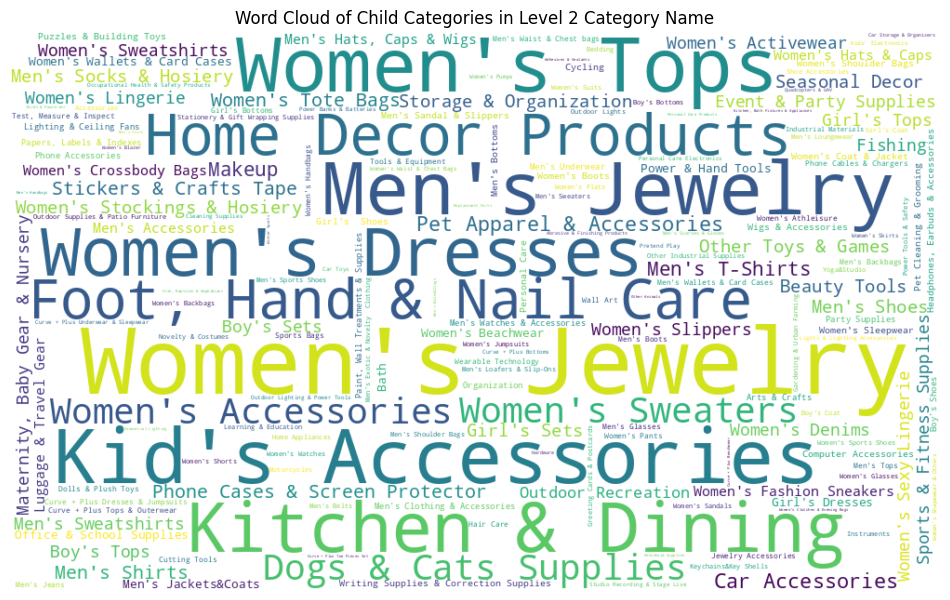

In [35]:
from wordcloud import WordCloud
unique_values = temu["Level2_Category_Name"].value_counts()
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate_from_frequencies(unique_values)

# Display the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Child Categories in Level 2 Category Name")
plt.axis("off")
plt.show()
wordcloud

### Mapping Child Categories to Parent Categories

In [36]:
grouped_categories = temu.groupby("Level1_Category_Name")["Level2_Category_Name"].unique()

# Converting the grouped categories into Dictionary
category_mapping = grouped_categories.to_dict()

# Converting Lists in the Dictionary values to Strings
category_mapping_str = {key:",".join(map(str, value)) for key, value in category_mapping.items()}

# Creating a new Dictionary to store the number of subcategories
num_subcategories = {key: len(value) for key, value in category_mapping.items()}

# Converting the Dictionaries into DataFrames
category_table = pd.DataFrame(category_mapping_str.items(), columns =["Level1_Category","Level2_Category_Name"])
num_subcategories_df = pd.DataFrame(num_subcategories.items(), columns=["Level1_Category","Number_of_Subcategories"])

# Merging the two DataFrames
category_table = category_table.merge(num_subcategories_df, on="Level1_Category")
category_table

,Level1_Category,Level2_Category_Name,Number_of_Subcategories
0,Automotive,"Car Storage & Organizers,Tools & Equipment,Car...",7
1,Bags & Luggages,"Women's Backbags,Luggage & Travel Gear,Men's W...",14
2,Beauty & Health,"Wigs & Accessories,Personal Care,Makeup,Hair C...",6
3,Electronics & Appliances,"Quadcopters & UAV,Headphones, Earbuds & Access...",10
4,Health & Household,"Personal Care Products,Wellness & Relaxation P...",6
5,Home & Kitchen,"Cleaning Supplies,Air Quality & Irons,Storage ...",12
6,Industrial & Commercial,"Adhesives & Sealants,Commercial Lighting,Power...",9
7,Jewelry & Accessories,"Men's Scarves & Gloves,Men's Belts,Men's Hats,...",13
8,"Kid, Baby & Maternity","Girl's Sets,Boy's Coat,Girl's Dresses,Boy's Se...",14
9,Men's Clothing,"Men's Jackets&Coats,Men's Suits,Men's Bottoms,...",9


**Tree Maps facilitate easy comparison between different categories and their subcategories**. Next, we are going to make a tree map based on the map we built to help us identify trends or anomalies within the parent-child hierarchy.

(0.0, 100.0, 0.0, 100.0)

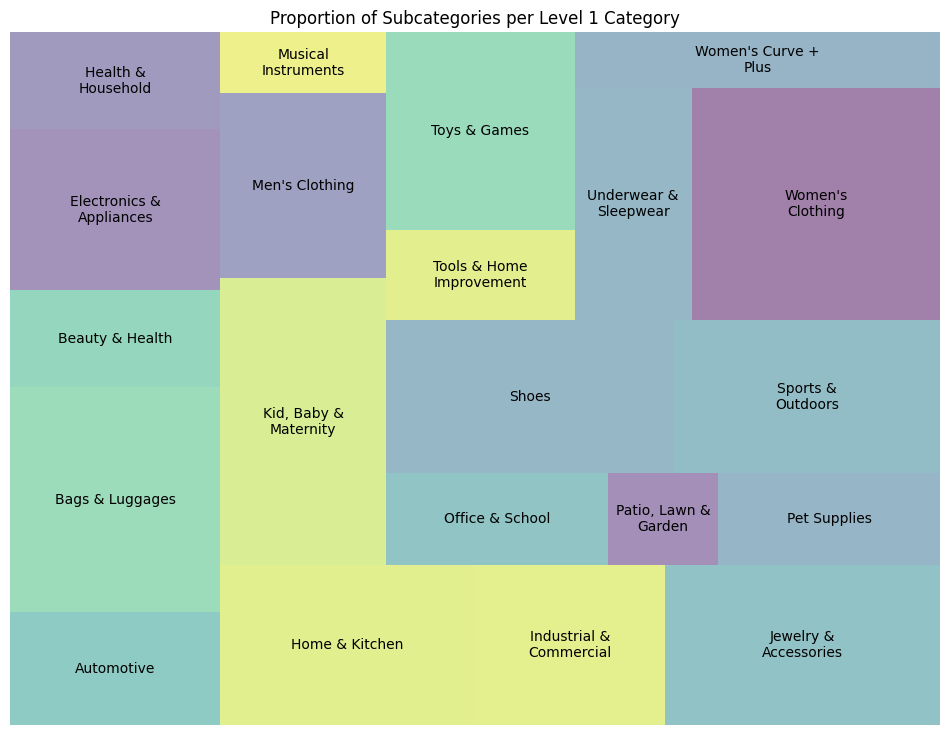

In [37]:
# Loading tree map visualization tools
import squarify
import textwrap

 # Calculating the percentage of subcategories for each category
total_subcategories = category_table.groupby('Level1_Category')["Number_of_Subcategories"].sum()
percentages = (total_subcategories/total_subcategories.sum())*100

# Plotting the figure
plt.figure(figsize = (12,9))

# Splitting the labels into two lines
labels = [textwrap.fill(label, width=15) for label in percentages.index]
squarify.plot(sizes=percentages, label=labels, alpha=0.5)
plt.rcParams.update({'font.size': int(min(10, 1000/ len(percentages)))})

plt.title("Proportion of Subcategories per Level 1 Category")
plt.axis('off')

From the tree map, we can observe **a moderate variation in the number of subcategories** (child categories) per product category (parent category)

### Exploring Product Description

For product descriptions, we can utilize a word cloud to quickly visualizing text data in the case of product descriptions. Where the frequency of words is represented by their size or color, common themes, and patterns appear more prominently in the visualization.

(-0.5, 599.5, 399.5, -0.5)

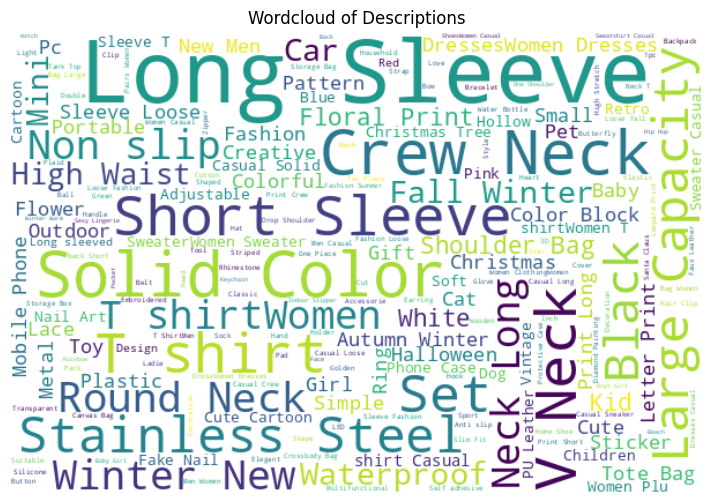

In [38]:
# First, concatenate all descriptions into a single string.
all_descriptions = "".join(temu['Description'].astype(str))
# Generate word cloud
wordcloud_description = WordCloud(width = 600, height =400, background_color = 'white').generate(all_descriptions)
# Now we are displaying the wordcloud
plt.figure(figsize=(9,6))
plt.imshow(wordcloud_description,interpolation='bilinear')
plt.title("Wordcloud of Descriptions")
plt.axis("off")

Words such as "T-shirt","Crew Neck", and "Long Sleeve" can be cross-tabulated with the top 5 parent categories. From the looks of it, this visualization appears to support the hypothesis that patterns in the product description text data align with our exploration findings for both the parent categories (i.e., the top 5) and children categories (i.e., the prominence of specific categories that map to parent categories).

## Data Transformation and Further Analysis

Now, we will create sales revenue as a new feature to have a deeper analysis of the temu sales. 

In [39]:
temu["Revenue"] = temu['Sales_Volume']*temu["Price"]
temu.head()

,Level1_Category_ID,Level1_Category_Name,Level2_Category_ID,Level2_Category_Name,Description,Sales_Volume,Price,Ratings,Number_of_Comments,Revenue
0,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,1pc 30 LED Bubble Ball Lights Solar String Lig...,5560.0,6.55,4.7,200,36418.00
1,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,50 LED Solar Sakura Lights Outdoor Waterproof ...,3569.0,5.89,4.7,200,21021.41
2,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,10m 20m 30m Solar Copper Wire String Light Hol...,2364.0,4.89,4.7,200,11559.96
3,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"LED String Lights, Battery Operated Copper Wir...",538.0,1.59,5.0,1,855.42
4,885,"Patio, Lawn & Garden",888,Outdoor Supplies & Patio Furniture,"1pc 39ft 100LED Solar String Lights, Waterproo...",474.0,8.39,4.7,200,3976.86


In [40]:
# Manually format currency without using locale module
def format_currency(amount):
    return "${:,.2f}".format(amount)

total_revenue = temu["Revenue"].sum()
formatted_total_revenue = format_currency(total_revenue)
print(f"The overall sales revenue is {formatted_total_revenue}.")

The overall sales revenue is $18,503,237.02.


### Breaking down of overall sales revenue per parent product category.

In [41]:
temu.columns

Index(['Level1_Category_ID', 'Level1_Category_Name', 'Level2_Category_ID',
       'Level2_Category_Name', 'Description', 'Sales_Volume', 'Price',
       'Ratings', 'Number_of_Comments', 'Revenue'],
      dtype='object')

In [42]:
# Aggregate revenue by Level 1 category
grouped_revenue = temu.groupby("Level1_Category_Name")["Revenue"].sum()

# Convert to dictionary for proportion calculation
revenue_dict = grouped_revenue.to_dict()

# Compute total revenue
total_revenue = sum(revenue_dict.values())

# Calculate each category's revenue proportion (as % string)
proportion_dict = {
    k: f"{round((v / total_revenue) * 100, 1)}%" for k, v in revenue_dict.items()
}

# Create revenue and proportion DataFrames
revenue_df = pd.DataFrame(revenue_dict.items(), columns=["Level1_Category", "Total_Revenue"])
proportion_df = pd.DataFrame(proportion_dict.items(), columns=["Level1_Category", "Proportion"])

# Merge into a summary table
revenue_by_category = revenue_df.merge(proportion_df, on="Level1_Category")

# Sort by revenue and reset index
revenue_by_category.sort_values(by="Total_Revenue", ascending=False, inplace=True)
revenue_by_category.reset_index(drop=True, inplace=True)

# Final output
revenue_by_category

,Level1_Category,Total_Revenue,Proportion
0,"Kid, Baby & Maternity",2876112.03,15.5%
1,Home & Kitchen,2695541.07,14.6%
2,Shoes,1891767.56,10.2%
3,Women's Clothing,1664082.30,9.0%
4,Electronics & Appliances,1458748.86,7.9%
5,Sports & Outdoors,1048181.38,5.7%
6,Jewelry & Accessories,1006876.82,5.4%
7,Toys & Games,901892.19,4.9%
8,Men's Clothing,842914.44,4.6%
9,Beauty & Health,755944.08,4.1%


<Axes: title={'center': 'Revenue Proportion by Category'}, ylabel='Level1_Category'>

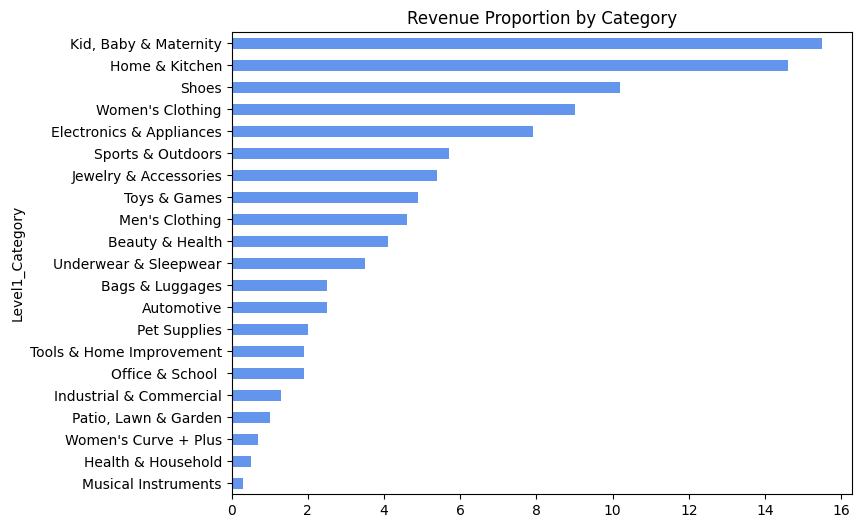

In [43]:
# Ensure Proportion is float
if revenue_by_category["Proportion"].dtype == "O":
    revenue_by_category["Proportion"] = revenue_by_category["Proportion"].str.rstrip("%").astype(float)

# Sort the data
revenue_by_category_sorted = revenue_by_category.sort_values(by="Proportion", ascending=True)

# Plot
revenue_by_category_sorted.plot(
    kind="barh",
    y="Proportion",
    x="Level1_Category",
    figsize=(8, 6),
    legend=False,
    color="cornflowerblue",
    title="Revenue Proportion by Category"
)

The top five sources of revenue are “Kid, Baby & Maternity,” “Home & Kitchen,” “Shoes,” “Women’s Clothing,” and “Electronics & Appliances.” These categories alone account for more than half of the total revenue. Some of them, like “Electronics & Appliances” and “Tools & Home Improvement,” likely involve higher-priced items, while others, such as “Shoes,” “Kid, Baby & Maternity,” and “Home & Kitchen,” are more associated with frequent, lower-cost purchases. 

### Mapping Revenue to Product Category Hierarchy

In [44]:
# Merge two tables based on Level_1_Category
combined_table = pd.merge(revenue_by_category, category_table, on="Level1_Category", how="left")

# Rearrange the columns: Level_1_Category, Level2_Category_Name, Total_Revenue, Proportion
combined_table = combined_table[["Level1_Category", "Level2_Category_Name", "Total_Revenue", "Proportion"]]

# Add "%" sign back to the Proportion column
combined_table["Proportion"] = combined_table["Proportion"].astype(str) + "%"

# Display the combined table
combined_table

,Level1_Category,Level2_Category_Name,Total_Revenue,Proportion
0,"Kid, Baby & Maternity","Girl's Sets,Boy's Coat,Girl's Dresses,Boy's Se...",2876112.03,15.5%
1,Home & Kitchen,"Cleaning Supplies,Air Quality & Irons,Storage ...",2695541.07,14.6%
2,Shoes,"Women's Fashion Sneakers,Women's Slippers,Men'...",1891767.56,10.2%
3,Women's Clothing,"Women's Cosplay Costume,Women's Denims,Women's...",1664082.30,9.0%
4,Electronics & Appliances,"Quadcopters & UAV,Headphones, Earbuds & Access...",1458748.86,7.9%
5,Sports & Outdoors,"Women's Sports Shoes,Outdoor Lights,Outdoor Re...",1048181.38,5.7%
6,Jewelry & Accessories,"Men's Scarves & Gloves,Men's Belts,Men's Hats,...",1006876.82,5.4%
7,Toys & Games,"Kids' Electronics,Car Toys,Puzzles & Building ...",901892.19,4.9%
8,Men's Clothing,"Men's Jackets&Coats,Men's Suits,Men's Bottoms,...",842914.44,4.6%
9,Beauty & Health,"Wigs & Accessories,Personal Care,Makeup,Hair C...",755944.08,4.1%


### Mapping Product Count to Product Category Hierarchy¶

In [45]:
# Count total number of products (including duplicates) for each Level 1 category
all_count = temu.groupby("Level1_Category_Name")["Description"].count().reset_index(name="Total_Products")

# Count the number of unique products (excluding duplicates) for each Level 1 category
unique_count = temu.groupby("Level1_Category_Name")["Description"].nunique().reset_index(name="Unique_Products")

# Merge the total and unique product counts into a single DataFrame
product_count_comparison = pd.merge(all_count, unique_count, on="Level1_Category_Name")

# Display the result
product_count_comparison

,Level1_Category_Name,Total_Products,Unique_Products
0,Automotive,2380,2334
1,Bags & Luggages,5400,5241
2,Beauty & Health,5240,5119
3,Electronics & Appliances,3780,3535
4,Health & Household,420,417
5,Home & Kitchen,8480,8348
6,Industrial & Commercial,1820,1809
7,Jewelry & Accessories,12860,12433
8,"Kid, Baby & Maternity",9657,9405
9,Men's Clothing,5200,4574


In this analysis, the number of products per Level 1 category is calculated based on unique product descriptions. This approach avoids double-counting duplicate entries and better reflects the actual variety of products available in each category.

### Joining Revenue and Product Count by Category

In [46]:
# Group by Level 1 Category and sum revenue
revenue_by_category = temu.groupby("Level1_Category_Name")["Revenue"].sum().reset_index()
revenue_by_category.rename(columns={"Level1_Category_Name": "Level1_Category", "Revenue": "Total_Revenue"}, inplace=True)

# Calculate revenue proportion
total_revenue = revenue_by_category["Total_Revenue"].sum()
revenue_by_category["Proportion"] = (revenue_by_category["Total_Revenue"] / total_revenue * 100).round(1).astype(str) + "%"

# Group subcategories under each Level 1 Category
grouped_categories = temu.groupby("Level1_Category_Name")["Level2_Category_Name"].unique().to_dict()
category_mapping_str = {k: ", ".join(map(str, v)) for k, v in grouped_categories.items()}
num_subcategories = {k: len(v) for k, v in grouped_categories.items()}

category_table = pd.DataFrame(category_mapping_str.items(), columns=["Level1_Category", "Level2_Category_Name"])
num_subcategories_df = pd.DataFrame(num_subcategories.items(), columns=["Level1_Category", "Number_of_Subcategories"])
category_table = category_table.merge(num_subcategories_df, on="Level1_Category")

# Merge revenue + subcategory
combined_table = pd.merge(revenue_by_category, category_table, on="Level1_Category", how="left")

# Count unique products (using Description)
product_count = temu.groupby("Level1_Category_Name")["Description"].nunique().reset_index(name="Product_Count")
product_count.rename(columns={"Level1_Category_Name": "Level1_Category"}, inplace=True)



# Merge product count into combined table
combined_table["Proportion"] = combined_table["Proportion"].str.rstrip("%").astype(float)
merged = pd.merge(combined_table, product_count, on="Level1_Category", how="left")

# Reorder columns and sort by proportion
merged = merged[["Level1_Category", "Number_of_Subcategories", "Product_Count", "Total_Revenue", "Proportion"]]
merged.sort_values(by="Proportion", ascending=False, inplace=True)
merged["Proportion"] = merged["Proportion"].astype(str) + "%"
merged.reset_index(drop=True, inplace=True)

# Display final result
merged

,Level1_Category,Number_of_Subcategories,Product_Count,Total_Revenue,Proportion
0,"Kid, Baby & Maternity",14,9405,2876112.03,15.5%
1,Home & Kitchen,12,8348,2695541.07,14.6%
2,Shoes,13,4574,1891767.56,10.2%
3,Women's Clothing,17,11144,1664082.30,9.0%
4,Electronics & Appliances,10,3535,1458748.86,7.9%
5,Sports & Outdoors,12,4990,1048181.38,5.7%
6,Jewelry & Accessories,13,12433,1006876.82,5.4%
7,Toys & Games,11,4577,901892.19,4.9%
8,Men's Clothing,9,4574,842914.44,4.6%
9,Beauty & Health,6,5119,755944.08,4.1%


#### Product Variety vs Revenue Contribution by Category
To understand how product variety relates to revenue performance across top-level categories.

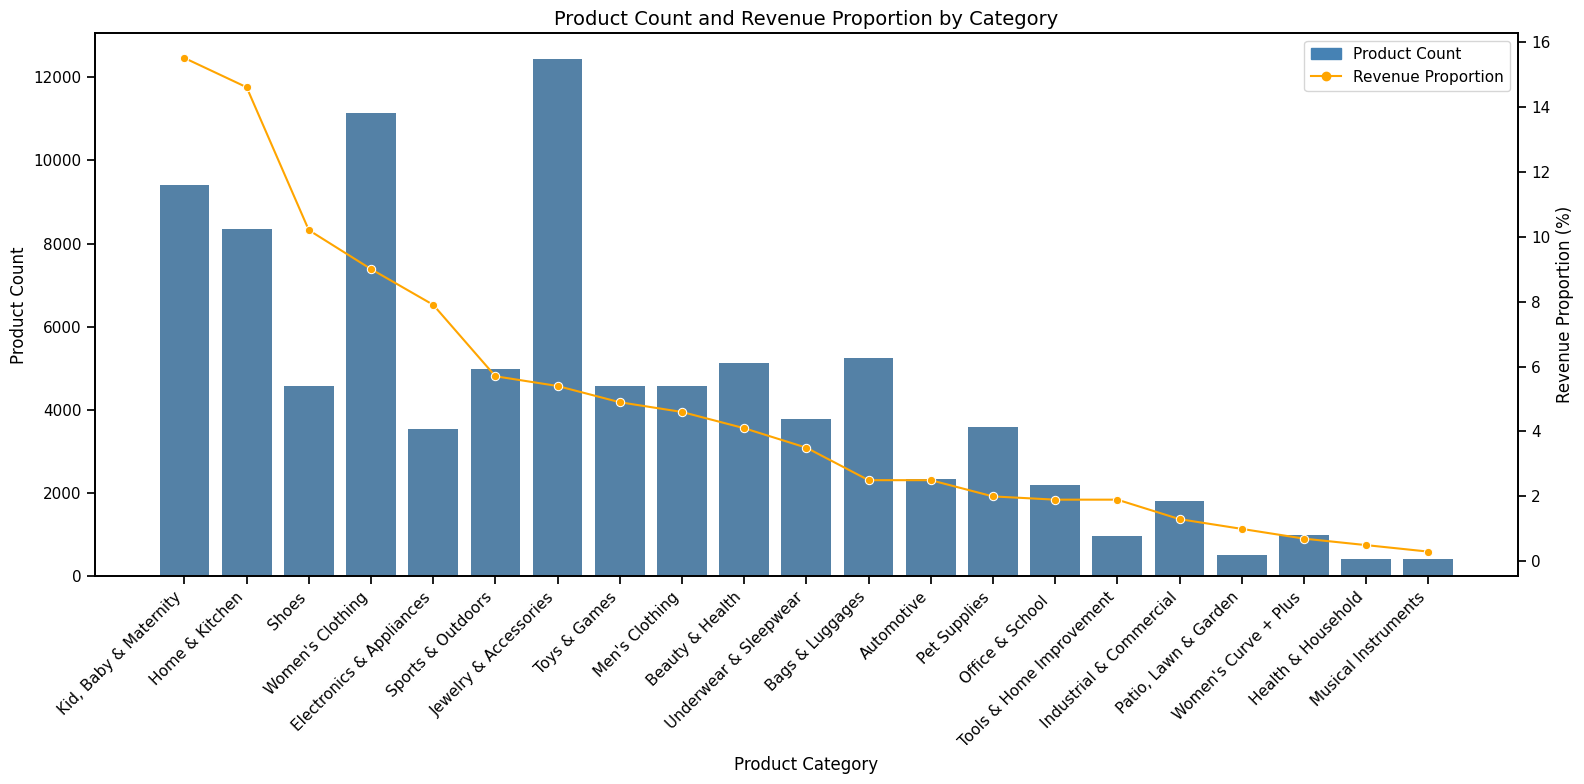

In [47]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Prepare data
categories = merged["Level1_Category"]
product_counts = merged["Product_Count"]
revenue_proportions = merged["Proportion"].str.rstrip("%").astype(float)

# Set style
sns.set_context("notebook")

# Create plot
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=categories, y=product_counts, color="steelblue", zorder=2)
lineplot = sns.lineplot(x=range(len(categories)), y=revenue_proportions, color="orange", marker="o", ax=barplot.axes.twinx())

# Format labels and ticks
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
barplot.set_xlabel("Product Category")
barplot.set_ylabel("Product Count")
lineplot.set_ylabel("Revenue Proportion (%)")

# Add legend
handles = [
    Rectangle((0, 0), 1, 1, color="steelblue", label="Product Count"),
    Line2D([], [], color="orange", marker="o", label="Revenue Proportion")
]
barplot.legend(handles=handles, loc="upper right")

# Title and layout
plt.title("Product Count and Revenue Proportion by Category", fontsize=14)
plt.tight_layout()
plt.show()

### Top 10 Product Categories by Average Sales Volume: Comments and Revenue Analysis

In an earlier step, we identified the top five Level 1 categories with the highest average sales volume:  
"Kid, Baby & Maternity", "Home & Kitchen", "Shoes", "Women's Clothing", and "Electronics & Appliances".

To broaden the analysis, we now include the next five categories ranked 6th to 10th in average sales volume:  
"Sports & Outdoors", "Jewelry & Accessories", "Toys & Games", "Men's Clothing", and "Beauty & Health".

These ten categories represent the highest-performing segments in terms of average sales volume.

#### Objective
The goal of this analysis is to examine whether high average sales volume is associated with:

- A higher number of customer comments
- A higher share of total revenue

This will help determine whether strong sales activity corresponds with customer engagement and actual revenue generation.

We now proceed to compare these categories across three key metrics:
1. Average sales volume
2. Number of comments
3. Total revenue

#### Select the top 10 categories by share in total revenue


In [48]:
top_10_revenue_categories = merged.head(10)
top_10_revenue_categories

,Level1_Category,Number_of_Subcategories,Product_Count,Total_Revenue,Proportion
0,"Kid, Baby & Maternity",14,9405,2876112.03,15.5%
1,Home & Kitchen,12,8348,2695541.07,14.6%
2,Shoes,13,4574,1891767.56,10.2%
3,Women's Clothing,17,11144,1664082.30,9.0%
4,Electronics & Appliances,10,3535,1458748.86,7.9%
5,Sports & Outdoors,12,4990,1048181.38,5.7%
6,Jewelry & Accessories,13,12433,1006876.82,5.4%
7,Toys & Games,11,4577,901892.19,4.9%
8,Men's Clothing,9,4574,842914.44,4.6%
9,Beauty & Health,6,5119,755944.08,4.1%


In [49]:
filtered_top_ten_on_revenue_reshaped = top_10_revenue_categories[["Level1_Category", "Proportion"]].rename(columns = {"Level1_Category":"Level1_Category_Name","Proportion":"Proportion"})
filtered_top_ten_on_revenue_reshaped

,Level1_Category_Name,Proportion
0,"Kid, Baby & Maternity",15.5%
1,Home & Kitchen,14.6%
2,Shoes,10.2%
3,Women's Clothing,9.0%
4,Electronics & Appliances,7.9%
5,Sports & Outdoors,5.7%
6,Jewelry & Accessories,5.4%
7,Toys & Games,4.9%
8,Men's Clothing,4.6%
9,Beauty & Health,4.1%


In [50]:
# Review key summary statistics for customer comment data
min_comments = temu["Number_of_Comments"].min()
max_comments = temu["Number_of_Comments"].max()
total_comments = temu["Number_of_Comments"].sum()
median_comments = temu["Number_of_Comments"].median()

print("Minimum Number of Comments:", min_comments)
print("Maximum Number of Comments:", max_comments)
print("Total Number of Comments:", total_comments)
print("Median Number of Comments:", median_comments)

Minimum Number of Comments: 1
Maximum Number of Comments: 3340
Total Number of Comments: 12095667
Median Number of Comments: 30.0


In [51]:
# Select top 10 Level 1 categories by total comments exceeding the median
grouped_comments = temu.groupby("Level1_Category_Name")["Number_of_Comments"].sum().reset_index()

median_comments = grouped_comments["Number_of_Comments"].median()

top_10_comment_groups = (
    grouped_comments[grouped_comments["Number_of_Comments"] > median_comments].copy()
)
top_10_comment_groups["Proportion_to_Median"] = (
    top_10_comment_groups["Number_of_Comments"] / median_comments
)

top_10_comment_groups = top_10_comment_groups.sort_values(
    by="Proportion_to_Median", ascending=False
).head(10)

top_10_comment_groups.rename(columns={"Level1_Category_Name": "Level1_Category"}, inplace=True)

top_10_comment_groups

,Level1_Category,Number_of_Comments,Proportion_to_Median
7,Jewelry & Accessories,2591164,7.915939
5,Home & Kitchen,2257734,6.897319
2,Beauty & Health,1009059,3.082649
8,"Kid, Baby & Maternity",876424,2.677453
17,Toys & Games,872695,2.666061
0,Automotive,689152,2.105342
11,Office & School,605469,1.849692
19,Women's Clothing,515452,1.574693
13,Pet Supplies,502554,1.535290
14,Shoes,401528,1.226658


#### The values of 'Proportion_to_Median' greater than 1 indicate that these categories have higher-than-median customer comment totals, suggesting a positively skewed distribution. We now filter to retain only the top 10 categories with the highest proportions.

In [52]:
# Select top 10 Level 1 categories by total comments exceeding the median
grouped_comments = temu.groupby("Level1_Category_Name")["Number_of_Comments"].sum().reset_index()

median_comments = grouped_comments["Number_of_Comments"].median()

top_10_comment_categories = grouped_comments[grouped_comments["Number_of_Comments"] > median_comments].copy()
top_10_comment_categories["Proportion_to_Median"] = top_10_comment_categories["Number_of_Comments"] / median_comments
top_10_comment_categories = top_10_comment_categories.sort_values(by="Proportion_to_Median", ascending=False).head(10)

top_10_comment_categories["Number_of_Comments_formatted"] = top_10_comment_categories["Number_of_Comments"].apply(lambda x: "{:,.0f}".format(x))
top_10_comment_categories.rename(columns={"Level1_Category_Name": "Level1_Category"}, inplace=True)

# Check column types
top_10_comment_categories.dtypes

Level1_Category                  object
Number_of_Comments                int64
Proportion_to_Median            float64
Number_of_Comments_formatted     object
dtype: object

In [53]:
# Select category name and proportion column for charting
top_10_comment_categories_reshaped = top_10_comment_categories[["Level1_Category", "Proportion_to_Median"]]
top_10_comment_categories_reshaped

,Level1_Category,Proportion_to_Median
7,Jewelry & Accessories,7.915939
5,Home & Kitchen,6.897319
2,Beauty & Health,3.082649
8,"Kid, Baby & Maternity",2.677453
17,Toys & Games,2.666061
0,Automotive,2.105342
11,Office & School,1.849692
19,Women's Clothing,1.574693
13,Pet Supplies,1.535290
14,Shoes,1.226658


In [54]:
# Merge all categories appearing in either top 10 revenue or top 10 comments
merged_df = pd.merge(
    top_10_revenue_categories[["Level1_Category", "Proportion"]],
    top_10_comment_categories_reshaped,
    on="Level1_Category",
    how="outer"
)

# Clean up and handle missing values
merged_df["Proportion"] = merged_df["Proportion"].str.rstrip("%").astype(float)
merged_df["Proportion_to_Median"] = merged_df["Proportion_to_Median"].fillna(0)
merged_df["Proportion"] = merged_df["Proportion"].fillna(0)

# Sort by revenue share
merged_df = merged_df.sort_values(by="Proportion", ascending=False)

merged_df

,Level1_Category,Proportion,Proportion_to_Median
5,"Kid, Baby & Maternity",15.5,2.677453
3,Home & Kitchen,14.6,6.897319
9,Shoes,10.2,1.226658
12,Women's Clothing,9.0,1.574693
2,Electronics & Appliances,7.9,0.000000
10,Sports & Outdoors,5.7,0.000000
4,Jewelry & Accessories,5.4,7.915939
11,Toys & Games,4.9,2.666061
6,Men's Clothing,4.6,0.000000
1,Beauty & Health,4.1,3.082649


#### Top 10 parent categories with the highest average sales compared to customer rating

**Generating the top 10 product segments based on their ratings**

In [55]:
# Define a formatting function
def format_with_commas(value):
    return "{:,.2f}".format(value)

In [56]:
# First, group the dataframe by "Level_1_Category_Name" and sum the 'goods_score' for each group
temu_grouped_by_level1 = temu.groupby("Level1_Category_Name")['Ratings'].sum().reset_index()

# Second, work out the median of ratings
median_ratings = temu_grouped_by_level1["Ratings"].median()

# Filtering the dataframe to include only the groups where the sum of ratings is higher than the median.
filtered_temu = temu_grouped_by_level1[temu_grouped_by_level1['Ratings']>median_ratings].copy()

# Then calculate the proportion of each group's ratings relative to median
filtered_temu["Proportion_to_Median"] = filtered_temu["Ratings"] / median_ratings
sorted_temu = filtered_temu.sort_values(by="Proportion_to_Median", ascending=False)

# Taking only the top 10 groups
top_ten_groups = sorted_temu.head(10).copy()

top_ten_groups["Ratings_formatted"] = top_ten_groups["Ratings"].apply(format_with_commas)

top_ten_groups

,Level1_Category_Name,Ratings,Proportion_to_Median,Ratings_formatted
7,Jewelry & Accessories,54006.4,3.098563,"54,006.40"
19,Women's Clothing,49742.2,2.853909,"49,742.20"
8,"Kid, Baby & Maternity",41078.5,2.356838,"41,078.50"
5,Home & Kitchen,35662.3,2.046089,"35,662.30"
2,Beauty & Health,22149.8,1.270822,"22,149.80"
9,Men's Clothing,21194.0,1.215984,"21,194.00"
1,Bags & Luggages,20770.8,1.191704,"20,770.80"
14,Shoes,18500.2,1.061430,"18,500.20"
15,Sports & Outdoors,18363.9,1.053610,"18,363.90"
18,Underwear & Sleepwear,17469.0,1.002266,"17,469.00"


In [57]:
top_ten_groups_with_score_reshaped = top_ten_groups[["Level1_Category_Name", "Proportion_to_Median"]]

top_ten_groups_with_score_reshaped

,Level1_Category_Name,Proportion_to_Median
7,Jewelry & Accessories,3.098563
19,Women's Clothing,2.853909
8,"Kid, Baby & Maternity",2.356838
5,Home & Kitchen,2.046089
2,Beauty & Health,1.270822
9,Men's Clothing,1.215984
1,Bags & Luggages,1.191704
14,Shoes,1.061430
15,Sports & Outdoors,1.053610
18,Underwear & Sleepwear,1.002266


**Merge the top 10 product categories table based on share in revenue with the top 10 product categories based on score relative to median.**

In [58]:
# Using dataframes "filter_top_ten_on_revenue_reshaped" and "top_ten_groups_with_score_reshaped"
# Concatenating the dataframes
merged_temu = pd.concat([filtered_top_ten_on_revenue_reshaped, top_ten_groups_with_score_reshaped], ignore_index=True)

# Grouping by 'Level_1_Category' and aggregate the values
merged_temu = merged_temu.groupby("Level1_Category_Name").agg({
    "Proportion": lambda x: float(x.dropna().str.rstrip("%").astype(float).mean()),  # Converting to float, remove "%" sign, and calculate mean
    "Proportion_to_Median": "mean"
}).reset_index()

# Sorting the dataframe by "Proportion" column in descending order
merged_temu = merged_temu.sort_values(by="Proportion", ascending=False)

# Outputting the resulting dataframe
merged_temu

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Level1_Category_Name,Proportion,Proportion_to_Median
5,"Kid, Baby & Maternity",15.5,2.356838
3,Home & Kitchen,14.6,2.046089
7,Shoes,10.2,1.061430
11,Women's Clothing,9.0,2.853909
2,Electronics & Appliances,7.9,NaN
8,Sports & Outdoors,5.7,1.053610
4,Jewelry & Accessories,5.4,3.098563
9,Toys & Games,4.9,NaN
6,Men's Clothing,4.6,1.215984
1,Beauty & Health,4.1,1.270822


The top 10 highest grossing product categories shows a moderately positive correlation with the customer ratings.

## Conclusion

In our analysis, we aimed to identify the most influential features affecting Temu’s sales data. To achieve this, we examined price, product category, customer feedback, and ratings.

By comparing each item's contribution to total revenue, we developed a general understanding of revenue distribution and the key factors influencing it. Our findings can be summarized into three main parts:

1. Price and Categories
Price and product categories, which are also highly correlated with each other, show a strong relationship with sales performance.
The top five categories contributing to sales revenue are: Kid, Baby & Maternity, Home & Kitchen, Shoes, Women's Clothing, and Electronics & Appliances.
Further analysis reveals that revenue sources are balanced between:

    Big-ticket, low-volume item sales

    Bargain-priced, high-volume item sales

Based on these observations, we propose the following hypotheses for future testing:

    Sales revenue is significantly influenced by purchases of low-priced "essential" goods with broad and/or deep product lines (as suggested by the number of data points).

    Sales revenue is also significantly influenced by purchases of high-priced "luxury" goods with broad and/or deep product lines.

    Optimizing the balance between low-ticket and high-ticket items, in terms of pricing and product range, is key to maximizing total sales revenue.

2. Customer Comments
A slight correlation between the number of customer comments and revenue was observed, suggesting the need for further investigation. Future analysis should also consider the content of comments for deeper insights.

3. Customer Ratings
Similarly, a slight correlation was found between customer ratings and revenue. Further testing is required to better understand this relationship.



## What should we do next?

Our analysis of the Temu sales data provides only a preliminary overview of the full dataset. By applying fundamental statistical tools such as the median, variance, interquartile range (IQR), and visualization techniques, we have developed a general understanding of how total revenue is influenced.

However, to generate actionable insights from the current dataset and to better support future strategy development, further work is necessary:

    1. Apply machine learning techniques, particularly regression models, to build predictive models from the dataset.

    2. Expand the dataset to enhance model accuracy and robustness.

    3. Conduct more rigorous testing on key variables (e.g., category, price, number of comments, ratings) and consider incorporating additional relevant variables.

    4. For customer comments: it is insufficient to assess only the number of comments per product. The content of the comments — particularly key terms such as "fit" or "well" — offers more meaningful indicators of customer satisfaction. Implementing large language models (LLMs) to analyze comment content could uncover deeper insights and guide product improvements.